## Observations and Insights 

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combineData = pd.merge(mouse_metadata, study_results, on="Mouse ID")
# Display the data table for preview
combineData.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# Checking the number of mice.
mouseID = len(combineData["Mouse ID"].unique())
mouseID

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mice_duplicate = combineData[combineData.duplicated(["Timepoint", "Mouse ID"])]


In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
print("Duplicate Rows: ")
mice_duplicate

Duplicate Rows: 


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_combined = combineData.loc[combineData["Mouse ID"] != "g989"]
clean_combined = pd.DataFrame(clean_combined)
clean_combined.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [7]:
# Checking the number of mice in the clean DataFrame.
mouseID = len(clean_combined["Mouse ID"].unique())
mouseID

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
mean_volume = clean_combined.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
median_volume = clean_combined.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
var_volume = clean_combined.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
std_volume = clean_combined.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
sem_volume = clean_combined.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

summary = pd.DataFrame({"Mean":mean_volume, "Median":median_volume, 
                        "Variance":var_volume, "Std Deviation":std_volume, "SEM":sem_volume})
summary

,Mean,Median,Variance,Std Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
summary = clean_combined.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(['mean','median','var','std','sem'])
summary = summary.rename(columns={
    'mean':"Mean", "median":"Median", "var":"Variance", "std":"Std Deviation", "sem": "SEM"
})
summary

,Mean,Median,Variance,Std Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [10]:
clean_combined.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


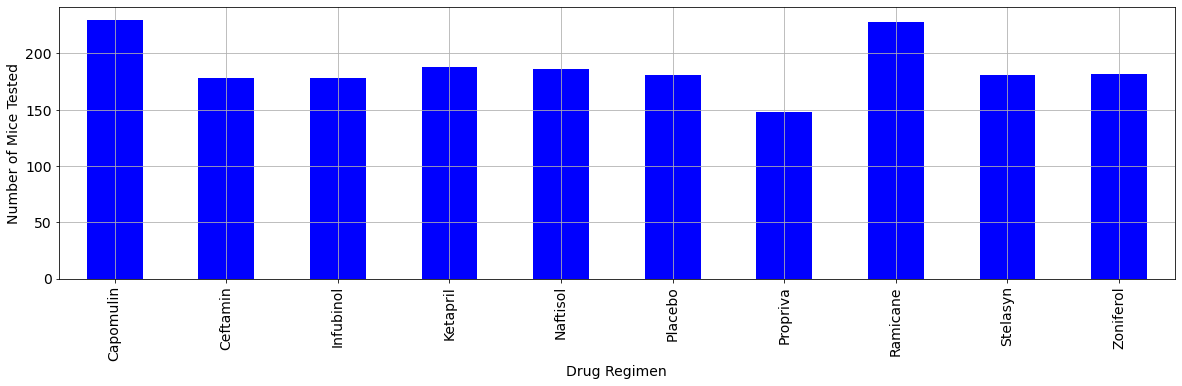

<Figure size 432x288 with 0 Axes>

In [11]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
# filter out drug regimen and timepoint
drugandtime = clean_combined.groupby(["Drug Regimen"]).count()["Timepoint"]
drugandtimeplot = drugandtime.plot(kind="bar", color="b", figsize=(20,5), fontsize=14)
plt.xlabel("Drug Regimen", fontsize=14)
plt.ylabel("Number of Mice Tested", fontsize=14)
plt.grid()

plt.show()
plt.tight_layout()




In [12]:
drugandtime.head()

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Name: Timepoint, dtype: int64

Text(0, 0.5, 'Number of Mice Treated')

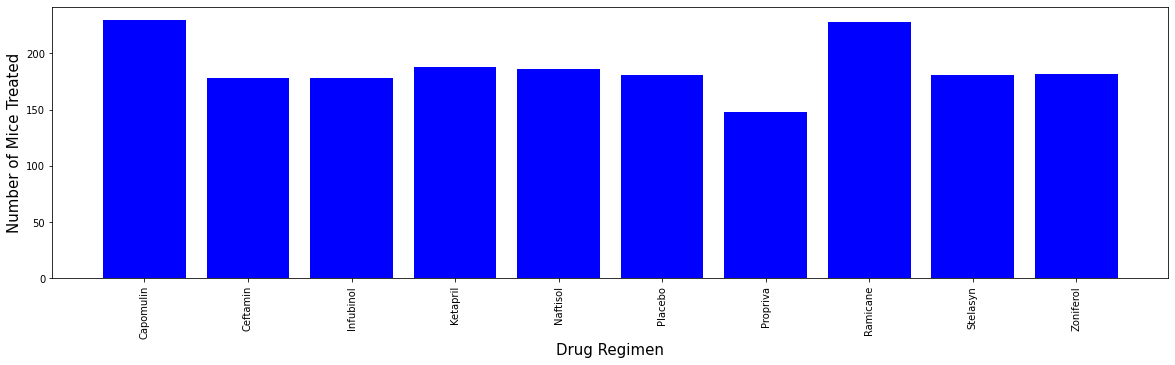

In [13]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
treatment_count = (clean_combined.groupby(["Drug Regimen"])["Timepoint"].count()).tolist()
treatment_count

x_axis = np.arange(len(drugandtime))
tick_locations = [value+0.4 for value in x_axis]
fig1, ax1 = plt.subplots(figsize=(20,5))
plt.xticks(tick_locations, drugandtime.index.values, rotation="vertical")
plt.bar(x_axis, treatment_count, color='b', alpha=1, align="edge")
plt.xlabel("Drug Regimen",fontsize = 15)
plt.ylabel("Number of Mice Treated",fontsize = 15)


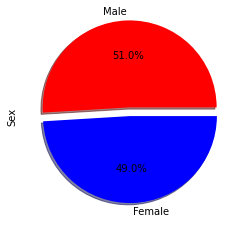

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_df = clean_combined["Sex"].value_counts()
explode = (0.1,0)
color = ["red","blue"]
sex_df = sex_df.plot.pie(explode=explode, colors=color, autopct="%1.1f%%", shadow=True)
#sex_df.set_ylabel('')


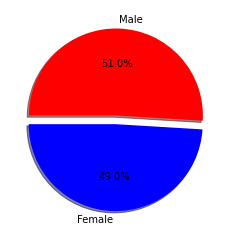

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
MouseID = [922,958]
sex = ["Female", "Male"]
colors = ['blue', 'red']
explode = (0.1, 0)
sex_plot = plt.pie(MouseID, labels = sex, colors = colors, startangle=180, 
                explode = explode, shadow = True, autopct="%1.1f%%")

## Quartiles, Outliers and Boxplots

In [16]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
greatest_timepoint = clean_combined.groupby(["Mouse ID"])["Timepoint"].max()
greatest_timepoint = greatest_timepoint.reset_index()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
greatest_merge = greatest_timepoint.merge(clean_combined, on= ["Mouse ID", "Timepoint"], how="left")
greatest_merge

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [17]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drugs in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_volume = greatest_merge.loc[greatest_merge["Drug Regimen"] == drugs, "Tumor Volume (mm3)"]
    
    # add subset 
    tumor_vol_data.append(tumor_volume)
    
    # Determine outliers using upper and lower bounds
    quartiles = tumor_volume.quantile([.25,.5,.75])
    lowerq = quartiles[.25]
    upperq = quartiles[.75]
    iqr = upperq - lowerq
    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

    outliers = tumor_volume.loc[(tumor_volume <= lower_bound) | (tumor_volume >= upper_bound)]
    print(f"For {drugs}'s, the potential outliers are: {outliers}")

    
        

For Capomulin's, the potential outliers are: Series([], Name: Tumor Volume (mm3), dtype: float64)
For Ramicane's, the potential outliers are: Series([], Name: Tumor Volume (mm3), dtype: float64)
For Infubinol's, the potential outliers are: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
For Ceftamin's, the potential outliers are: Series([], Name: Tumor Volume (mm3), dtype: float64)


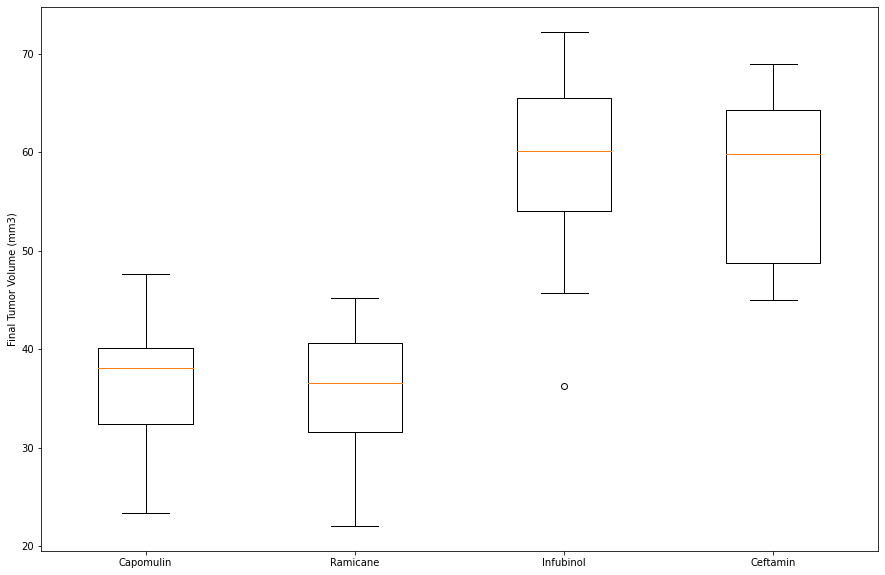

<Figure size 432x288 with 0 Axes>

In [18]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots(figsize=(15,10))
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(tumor_vol_data, labels=treatments)
plt.show()
plt.tight_layout()

## Line and Scatter Plots

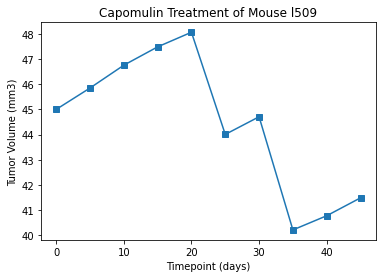

In [19]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
data = clean_combined.loc[clean_combined["Mouse ID"] == "l509"]
plt.plot(data["Timepoint"], data["Tumor Volume (mm3)"], marker='s')
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Treatment of Mouse l509")
plt.show()

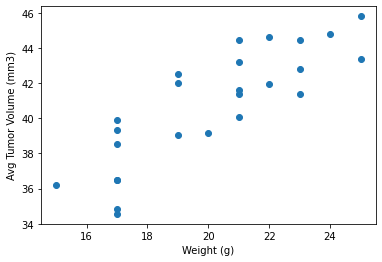

In [43]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

drug_data = clean_combined.loc[clean_combined["Drug Regimen"]=="Capomulin",:].groupby("Mouse ID")[["Weight (g)","Tumor Volume (mm3)"]].mean()
plt.scatter(drug_data["Weight (g)"],drug_data["Tumor Volume (mm3)"])
plt.xlabel("Weight (g)")
plt.ylabel("Avg Tumor Volume (mm3)")
plt.show()



## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


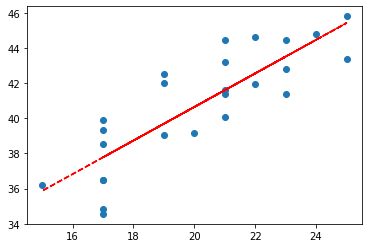

In [41]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
x_values = drug_data["Weight (g)"]
y_values = drug_data["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"
correlation = st.pearsonr(x_values,y_values)
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r--")
print(f"The correlation between mouse weight and the average tumor volume is {correlation[0]:.2f}")